# <center>Gaussian Mixture Models</center>

### Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [15]:
X, y_true = make_blobs(n_samples=400, centers=4,cluster_std=0.6,random_state=0)
X = X[:, ::-1]  ## reversed the columns

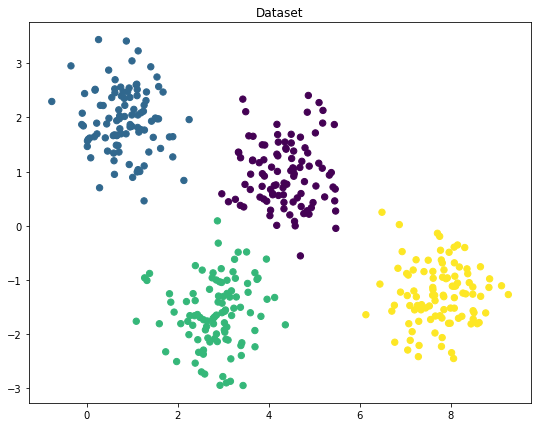

In [16]:
plt.figure(figsize=(9,7))
plt.scatter(X[:,0],X[:,1],c=y_true,s=40)
plt.title("Dataset")
plt.show()

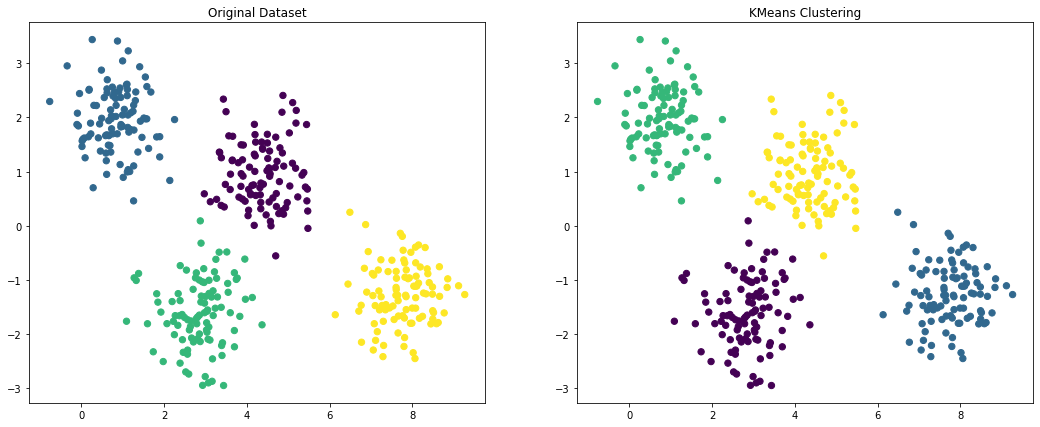

In [17]:
### Using KMeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

fig,ax = plt.subplots(1,2, figsize=(18,7))
ax[0].scatter(X[:,0],X[:,1],c=y_true,s=40)
ax[0].set_title("Original Dataset")
ax[1].scatter(X[:,0],X[:,1],c=kmeans_labels,s=40)
ax[1].set_title("KMeans Clustering")
plt.show()

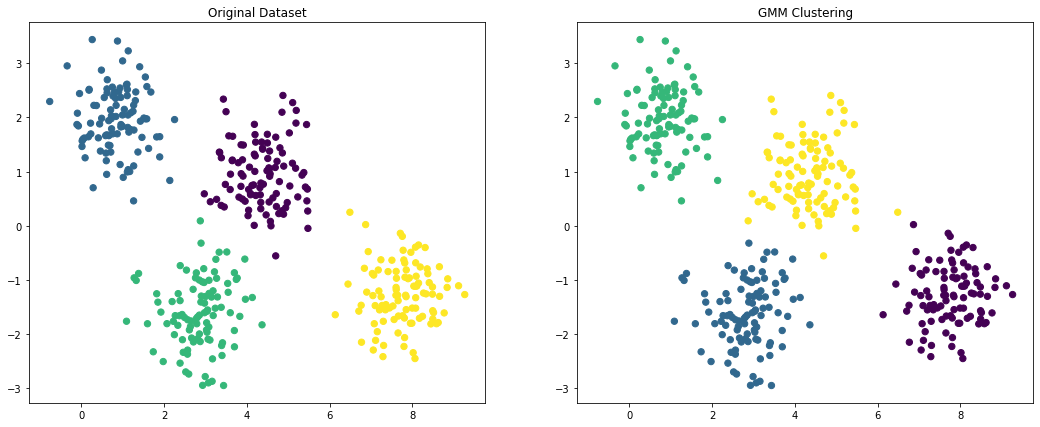

In [18]:
### Using GMM clustering
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4)
gmm_labels = gmm.fit_predict(X)

fig,ax = plt.subplots(1,2, figsize=(18,7))
ax[0].scatter(X[:,0],X[:,1],c=y_true,s=40)
ax[0].set_title("Original Dataset")
ax[1].scatter(X[:,0],X[:,1],c=gmm_labels,s=40)
ax[1].set_title("GMM Clustering")
plt.show()

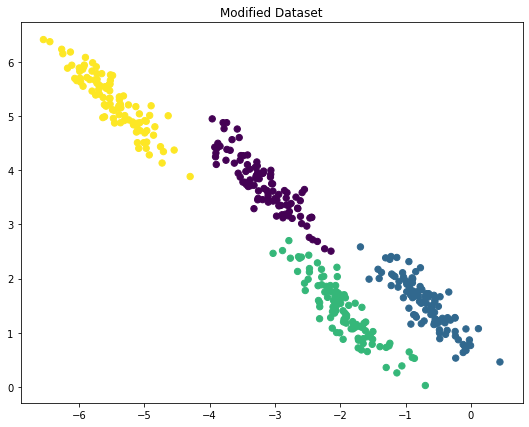

In [21]:
rdn = np.random.RandomState(13)
X_stretch  = np.dot(X, rdn.randn(2,2))
plt.figure(figsize=(9,7))
plt.scatter(X_stretch[:,0],X_stretch[:,1],c=y_true,s=40)
plt.title("Modified Dataset")
plt.show()

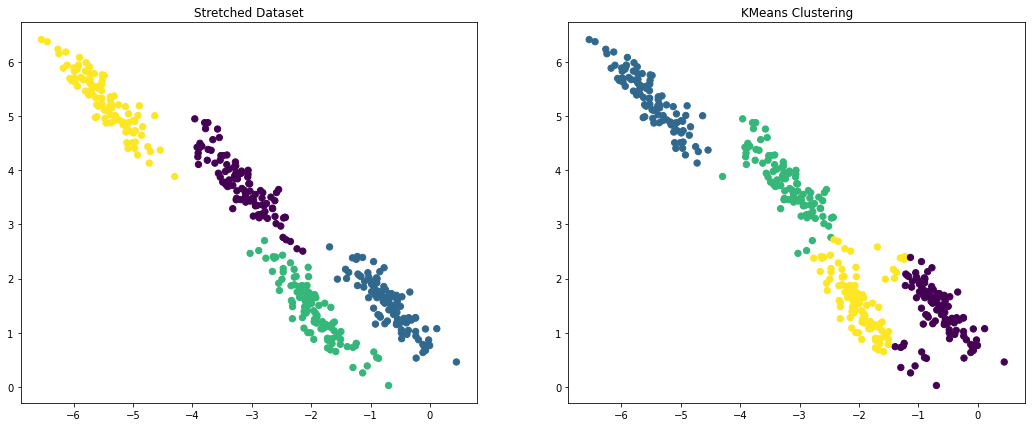

In [22]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(X_stretch)

fig,ax = plt.subplots(1,2, figsize=(18,7))
ax[0].scatter(X_stretch[:,0],X_stretch[:,1],c=y_true,s=40)
ax[0].set_title("Stretched Dataset")
ax[1].scatter(X_stretch[:,0],X_stretch[:,1],c=kmeans_labels,s=40)
ax[1].set_title("KMeans Clustering")
plt.show()

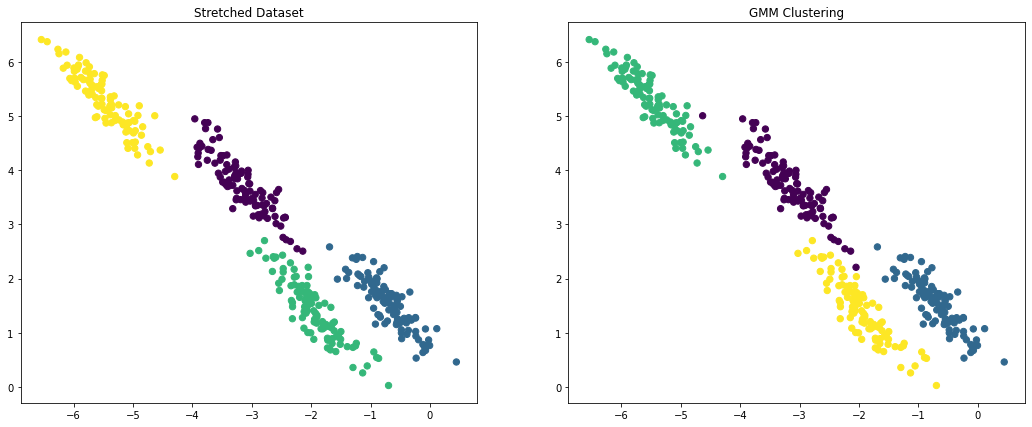

In [23]:
gmm = GMM(n_components=4,random_state=0)
gmm_labels = gmm.fit_predict(X_stretch)

fig,ax = plt.subplots(1,2, figsize=(18,7))
ax[0].scatter(X_stretch[:,0],X_stretch[:,1],c=y_true,s=40)
ax[0].set_title("Stretched Dataset")
ax[1].scatter(X_stretch[:,0],X_stretch[:,1],c=gmm_labels,s=40)
ax[1].set_title("GMM Clustering")
plt.show()

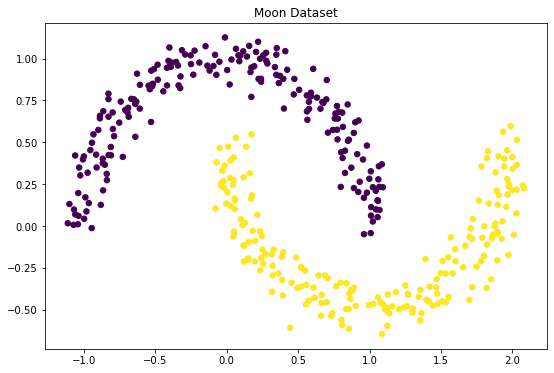

In [29]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(400, noise=0.08)

plt.figure(figsize=(9,6))
plt.scatter(Xmoon[:,0],Xmoon[:,1],c=ymoon,s=30)
plt.title("Moon Dataset")
plt.show()

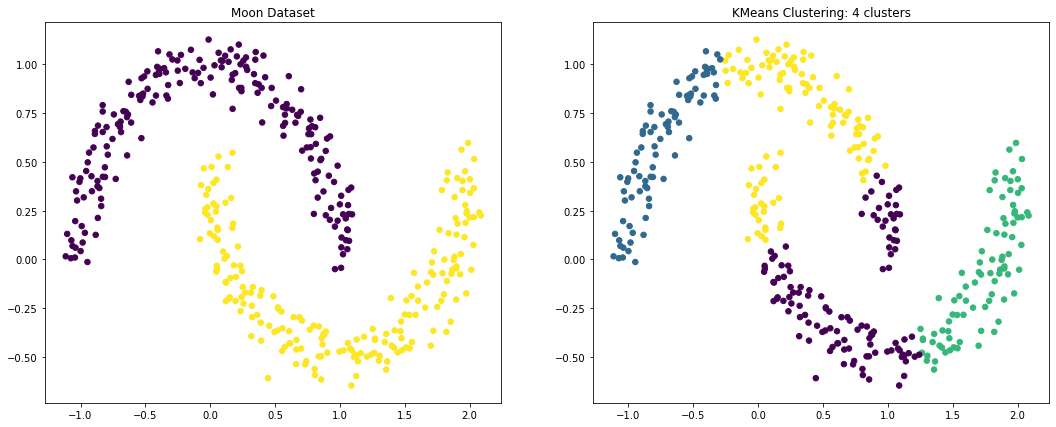

In [36]:
K = 4
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans_labels = kmeans.fit_predict(Xmoon)

fig,ax = plt.subplots(1,2, figsize=(18,7))
ax[0].scatter(Xmoon[:,0],Xmoon[:,1],c=ymoon,s=30)
ax[0].set_title("Moon Dataset")
ax[1].scatter(Xmoon[:,0],Xmoon[:,1],c=kmeans_labels,s=30)
ax[1].set_title("KMeans Clustering: {} clusters".format(K))
plt.show()

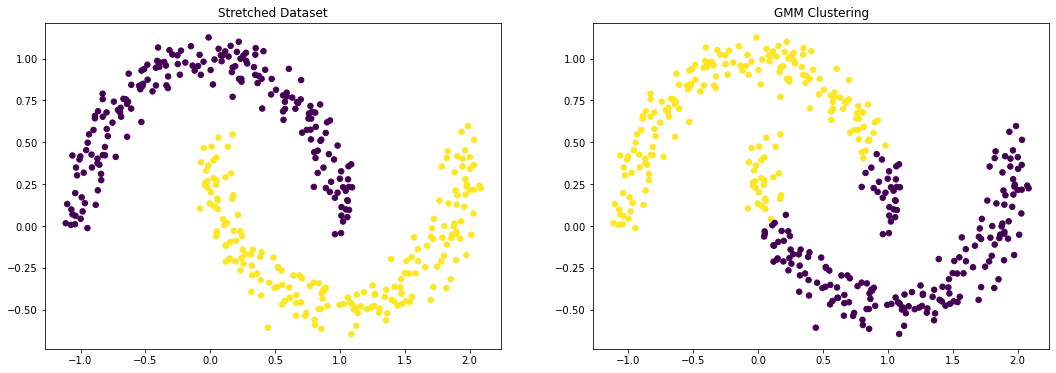

In [38]:
gmm2 = GMM(n_components=2,random_state=0)
gmm2_labels = gmm2.fit_predict(Xmoon)

fig,ax = plt.subplots(1,2, figsize=(18,6))
ax[0].scatter(Xmoon[:,0],Xmoon[:,1],c=ymoon,s=30)
ax[0].set_title("Stretched Dataset")
ax[1].scatter(Xmoon[:,0],Xmoon[:,1],c=gmm2_labels,s=30)
ax[1].set_title("GMM Clustering")
plt.show()

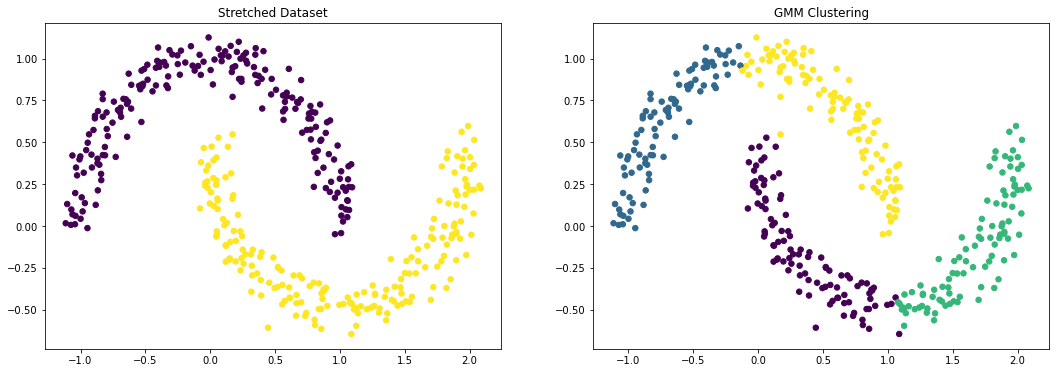

In [43]:
gmm4 = GMM(n_components=4,random_state=0)
gmm4_labels = gmm4.fit_predict(Xmoon)

fig,ax = plt.subplots(1,2, figsize=(18,6))
ax[0].scatter(Xmoon[:,0],Xmoon[:,1],c=ymoon,s=30)
ax[0].set_title("Stretched Dataset")
ax[1].scatter(Xmoon[:,0],Xmoon[:,1],c=gmm4_labels,s=30)
ax[1].set_title("GMM Clustering")
plt.show()

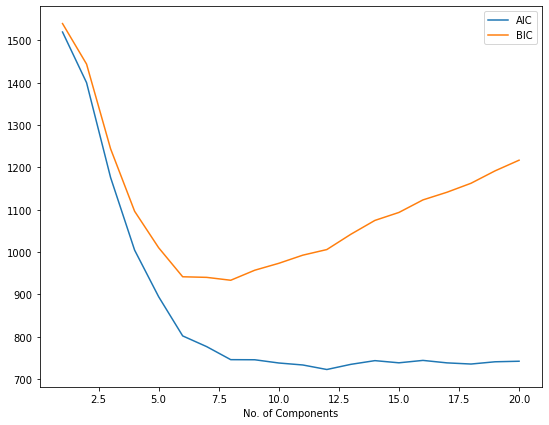

In [44]:
### getting to optimum number of components for a data
n_components = np.arange(1,21)
models = [GMM(n_components=n,random_state=0).fit(Xmoon) for n in n_components]
aic_ls = [m.aic(Xmoon) for m in models]
bic_ls = [m.bic(Xmoon) for m in models]
plt.figure(figsize=(9,7))
plt.plot(n_components,aic_ls,label='AIC')
plt.plot(n_components,bic_ls,label='BIC')
plt.legend()
plt.xlabel("No. of Components")
plt.show()

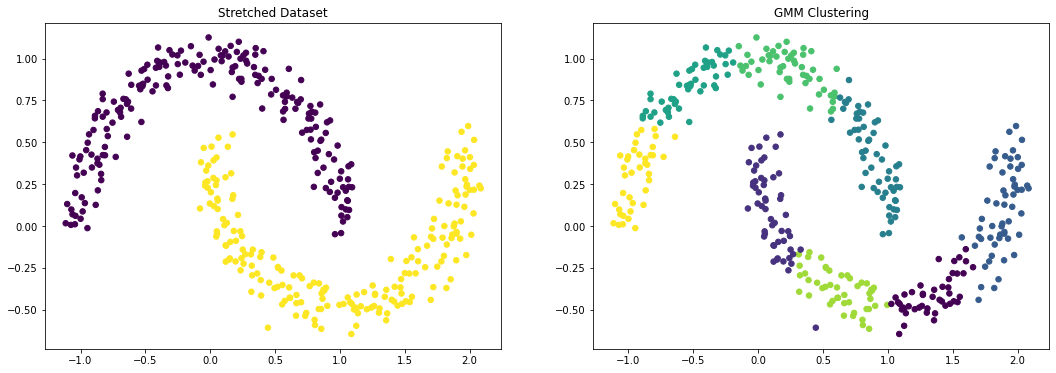

In [45]:
gmm8 = GMM(n_components=8,random_state=0)
gmm8_labels = gmm8.fit_predict(Xmoon)

fig,ax = plt.subplots(1,2, figsize=(18,6))
ax[0].scatter(Xmoon[:,0],Xmoon[:,1],c=ymoon,s=30)
ax[0].set_title("Stretched Dataset")
ax[1].scatter(Xmoon[:,0],Xmoon[:,1],c=gmm8_labels,s=30)
ax[1].set_title("GMM Clustering")
plt.show()

### GMM as a Generative Model

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

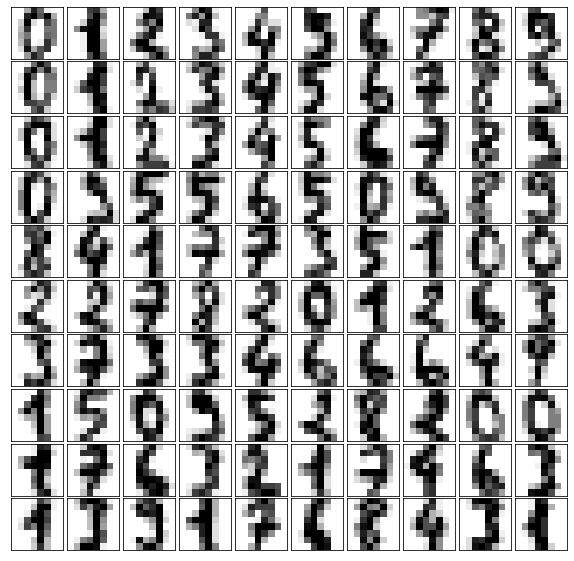

In [50]:
def plot_digits(data):
    fig, ax = plt.subplots(10,10,figsize=(10,10),subplot_kw=dict(xticks=[],yticks=[]))
    fig.subplots_adjust(hspace=0.05,wspace=0.05)

    for i, axi in enumerate(ax.flat):
        axi.imshow(data[i].reshape(8,8),cmap='binary')

plot_digits(digits.data)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(0.99,whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

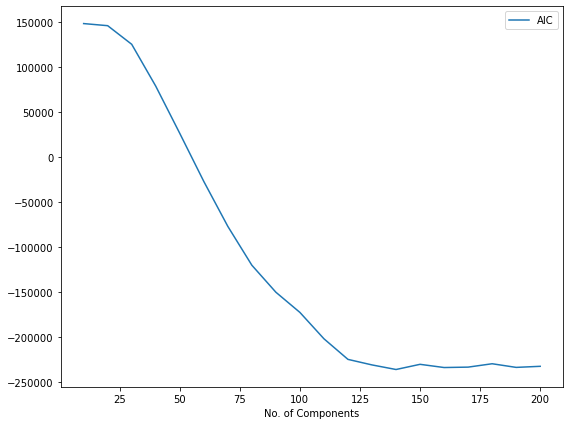

In [66]:
n_components = np.arange(10,210,10)
models = [GMM(n_components=n,random_state=0).fit(data) for n in n_components]
aic_ls = [m.aic(data) for m in models]
bic_ls = [m.bic(data) for m in models]
plt.figure(figsize=(9,7))
plt.plot(n_components,aic_ls,label='AIC')
# plt.plot(n_components,bic_ls,label='BIC')
plt.legend()
plt.xlabel("No. of Components")
plt.show()

In [81]:
gmm = GMM(n_components=150,random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [82]:
data_generated = gmm.sample(n_samples=100)[0]
data_generated

array([[-0.20585782, -1.21624769, -1.75486563, ..., -0.59303225,
         0.5554404 , -0.11259471],
       [-0.02398438,  2.25446714,  0.18906935, ..., -0.55579775,
         0.26953827,  1.05785184],
       [ 1.50579508, -0.7387839 , -1.26446077, ..., -1.72445506,
        -1.36911303, -1.87672571],
       ...,
       [-0.60045426, -0.93703932,  0.45145885, ...,  1.73130942,
        -0.51614241, -0.00554941],
       [ 0.67498393, -0.38358775,  0.6736777 , ..., -0.66766345,
        -0.26942311,  0.16482585],
       [ 0.81805409, -0.39713694,  0.68110901, ...,  0.19718182,
         0.86020705, -0.16957607]])

In [83]:
digits_new = pca.inverse_transform(data_generated)
digits_new.shape

(100, 64)

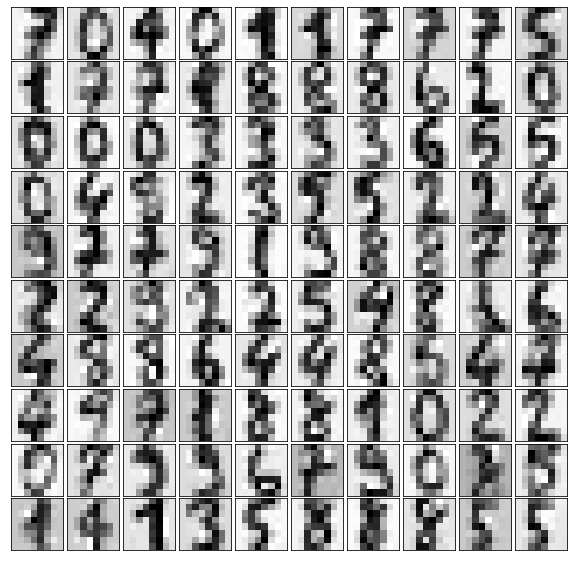

In [84]:
plot_digits(digits_new)

### Segmentation using GMM

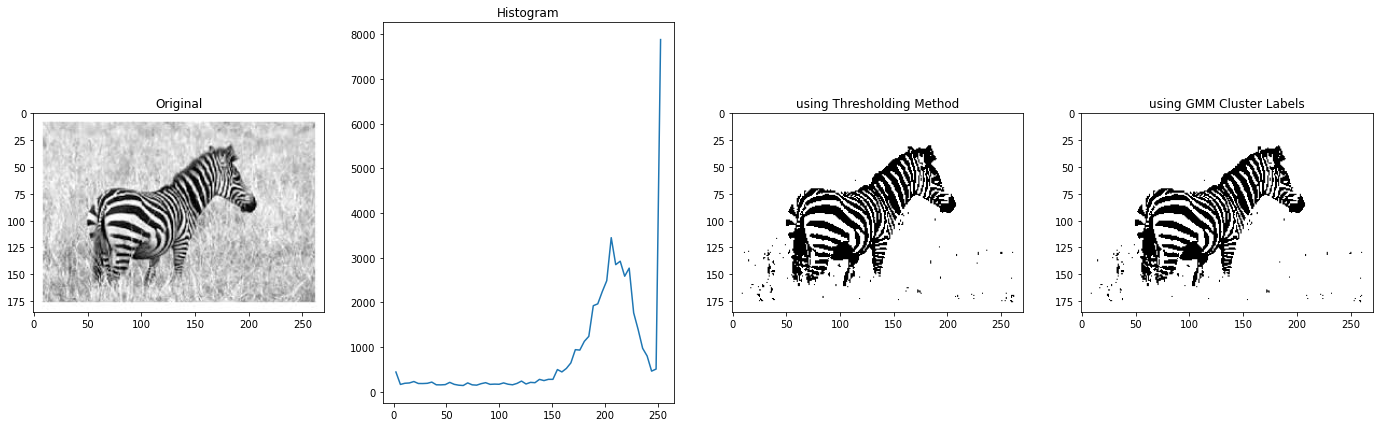

In [116]:
img = plt.imread("zebra.jpg")[:,:,0] # Taking a single channel 

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

gmm = GMM(n_components=2,random_state=2)
gmm.fit(img.reshape(img.size, 1))

threshold = np.mean(gmm.means_)
binary_img = img > threshold

img_seg = gmm.predict(img.reshape(img.size,1))

fig,ax = plt.subplots(1,4,figsize=(24,7))
ax[0].imshow(img,'gray')
ax[0].set_title("Original")
ax[1].plot(bin_centers,hist)
ax[1].set_title("Histogram")
ax[2].imshow(binary_img,'gray')
ax[2].set_title("using Thresholding Method")
ax[3].imshow(img_seg.reshape(img.shape),cmap='gray')
ax[3].set_title("using GMM Cluster Labels")
plt.show()

In [118]:
img = plt.imread("../week11/Mean-Shift-Clustering/sample.jpg")

flatten_img = np.reshape(img, [-1,3])
gmm = GMM(n_components=10,random_state=0)

labels = gmm.fit_predict(flatten_img)

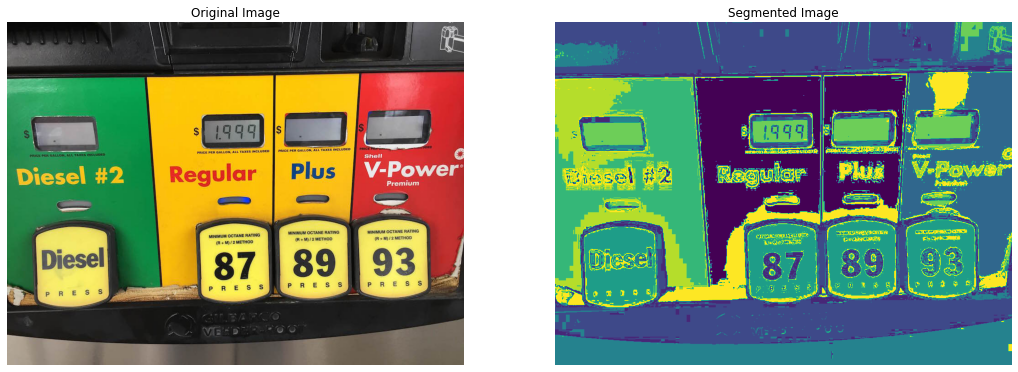

In [119]:
fig, ax = plt.subplots(1,2, figsize=(18,12))
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[1].imshow(np.reshape(labels, img.shape[:-1]))
ax[1].axis('off')
ax[1].set_title("Segmented Image")
plt.show()